# Phenomenological model constraining

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
from jetset.test_data_helper import  test_SEDs
from jetset.data_loader import ObsData,Data
from jetset.plot_sedfit import PlotSED
from jetset.test_data_helper import  test_SEDs


In [2]:
print(test_SEDs[1])
data=Data.from_file(test_SEDs[2])


/Users/orion/anaconda3/envs/jetset/lib/python3.7/site-packages/jetset-1.1.2-py3.7-macosx-10.9-x86_64.egg/jetset/test_data/SEDs_data/SED_MW_Mrk421_EBL_DEABS.ecsv


In [3]:
%matplotlib inline
from jetset.cosmo_tools import Cosmo
c=Cosmo()
sed_data=ObsData(data_table=data,cosmo=c)
sed_data.group_data(bin_width=0.2)
sed_data.add_systematics(0.2,[10.**6,10.**29])



***  binning data  ***
---> N bins= 90
---> bin_widht= 0.2



In [10]:
sed_data.save('Mrk_501.pkl')

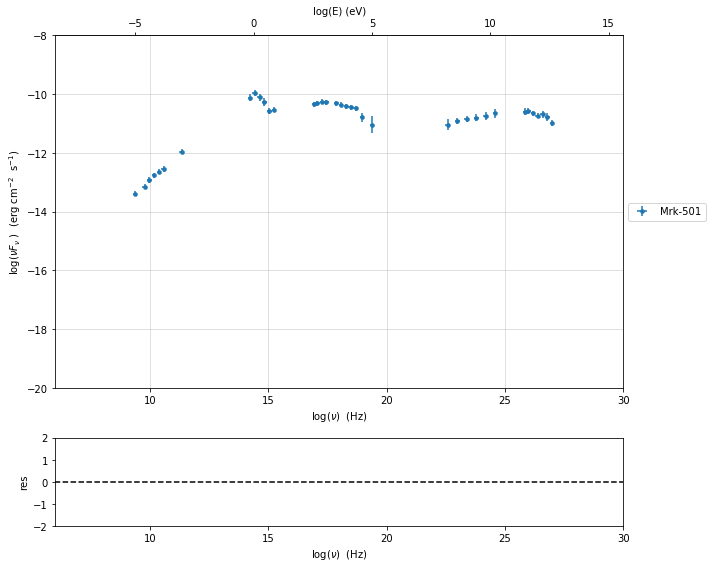

In [18]:
p=sed_data.plot_sed()


*** evaluating spectral indices for data ***



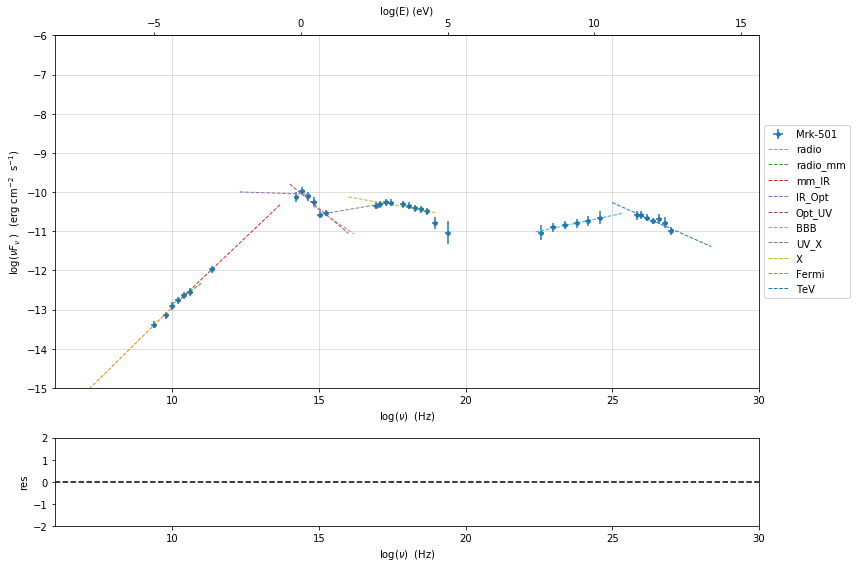

In [5]:
from jetset.sed_shaper import  SEDShape
my_shape=SEDShape(sed_data)
my_shape.eval_indices()
p=my_shape.plot_indices()
p.rescale(y_min=-15,y_max=-6)


*** Log-Polynomial fitting of the synchrotron component ***
---> first blind fit run,  fit range: [10, 21]
---> class:  HSP

---> class:  HSP


 model name     name      bestfit val     err +     err -   start val   fit range min fit range max frozen
----------- ------------ ------------- ------------ ----- ------------- ------------- ------------- ------
   LogCubic            b -7.192333e-02 1.382165e-02    -- -5.476187e-02 -1.000000e+01  0.000000e+00  False
   LogCubic            c -2.757549e-03 2.075296e-03    --  3.835964e-03 -1.000000e+01  1.000000e+01  False
   LogCubic           Ep  1.697013e+01 1.495082e-01    --  1.603696e+01  0.000000e+00  3.000000e+01  False
   LogCubic           Sp -1.029110e+01 3.685184e-02    -- -1.021047e+01 -3.000000e+01  0.000000e+00  False
host_galaxy nuFnu_p_host -1.007762e+01 7.831960e-02    -- -1.021047e+01 -1.221047e+01 -8.210473e+00  False
host_galaxy     nu_scale  3.438156e-02 1.030235e-03    --  0.000000e+00 -5.000000e-01  5.000000e-01  False

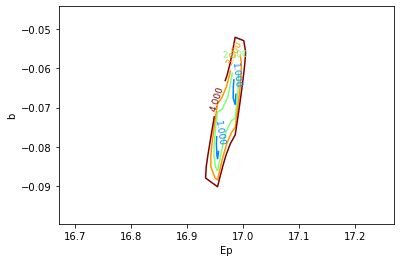

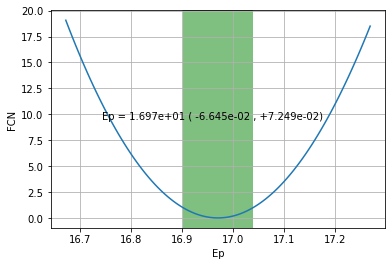

In [6]:
mm,best_fit=my_shape.sync_fit(check_host_gal_template=True,
                  Ep_start=None,
                  minimizer='minuit',
                  silent=True,
                  fit_range=[10,21])


mm.minimizer.minos_errors()
x,y,z,fig,ax=mm.minimizer.draw_contour('Ep','b')
x,y,fig,ax=mm.minimizer.draw_profile('Ep')


*** Log-Polynomial fitting of the IC component ***
---> fit range: [21, 29]
---> LogCubic fit

**************************************************************************************************
Fit report

Model: IC-shape-fit
model name name   par type       units          val      phys. bound. min phys. bound. max  log  frozen
---------- ---- ------------ ------------- ------------- ---------------- ---------------- ----- ------
  LogCubic    b    curvature               -1.239376e-01    -1.000000e+01     0.000000e+00 False  False
  LogCubic    c third-degree               -2.636682e-02    -1.000000e+01     1.000000e+01 False  False
  LogCubic   Ep    peak freq            Hz  2.545172e+01     0.000000e+00     3.000000e+01  True  False
  LogCubic   Sp    peak flux erg / (cm2 s) -1.057063e+01    -3.000000e+01     0.000000e+00  True  False

converged=True
calls=33
Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000 and the relative error between tw

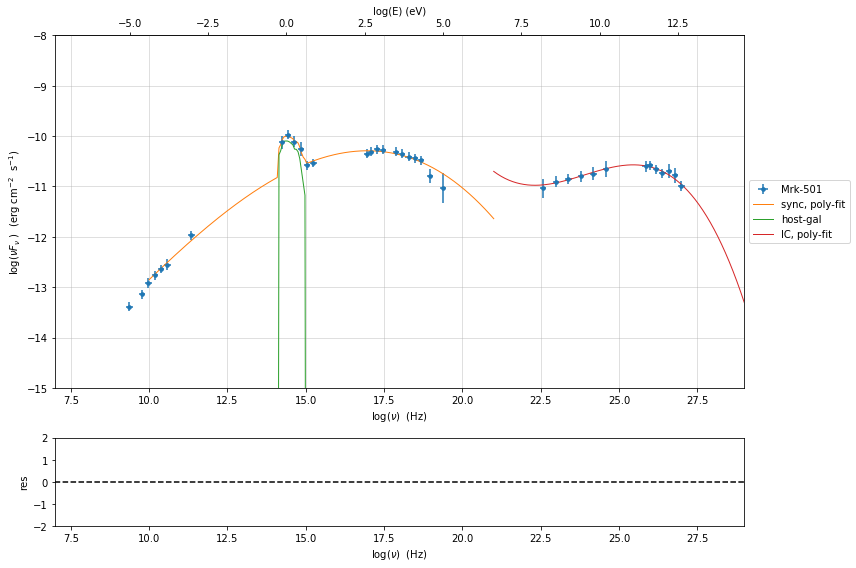

In [7]:
my_shape.IC_fit(fit_range=[21,29],minimizer='lsb')
p=my_shape.plot_shape_fit()
p.rescale(y_min=-15,x_min=7,x_max=29)

In [8]:
from jetset.obs_constrain import ObsConstrain
from jetset.model_manager import  FitModel
from jetset.minimizer import fit_SED
sed_obspar=ObsConstrain(beaming=15,
                        B_range=[0.01,0.1],
                        distr_e='lppl',
                        t_var_sec=1*86400,
                        nu_cut_IR=5E10,
                        SEDShape=my_shape)


jet=sed_obspar.constrain_SSC_model(electron_distribution_log_values=True,silent=False)


***  constrains parameters from observable ***

---> ***  emitting region parameters  ***
---> name = beam_obj          type = beaming               units = Lorentz-factor*   val = +1.500000e+01  phys-bounds = [+1.000000e-04,No           ] islog = False  froze= False 
---> setting par type redshift, corresponding to par z_cosm
--->  name = z_cosm            type = redshift              units =                   val = +3.360000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type magnetic_field, corresponding to par B
--->  name = B                 type = magnetic_field        units = G                 val = +5.500000e-02  phys-bounds = [+0.000000e+00,No           ] islog = False  froze= False 

---> setting par type region_size, corresponding to par R
--->  name = R                 type = region_size           units = cm                val = +3.759008e+16  phys-bounds = [+1.000000e+03,+1.000000e+30] islog = False  froze= False 


---> **

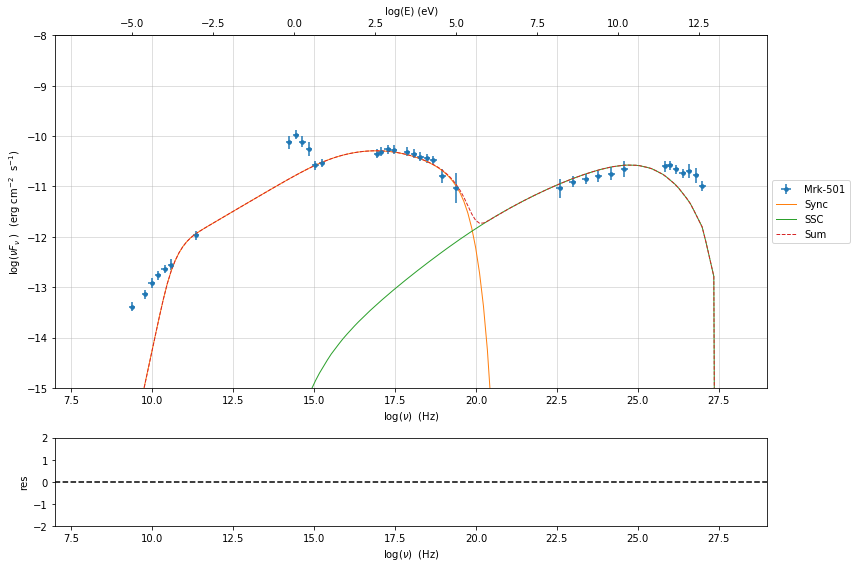

In [9]:
pl=jet.plot_model(sed_data=sed_data)
pl.rescale(y_min=-15,x_min=7,x_max=29)
jet.save_model('constrained_jet.pkl')